In [1]:
# basic packages
import pandas as pd
import numpy as np
import datetime as dt
from pytz import timezone
import urllib
import os
import math
from scipy import stats
from scipy.signal import find_peaks, spectrogram

# packages for visualizations
import matplotlib.dates as mdates
import seaborn as sns

from matplotlib import pyplot as plt


In [3]:
file_path = './CC_LCL-HourlyData.csv'

df=pd.read_csv(file_path )
df

,LCLid,DateTime,KWH/hh (per half hour)
0,MAC000002,2012-10-12 12:00:00,0.143
1,MAC000002,2012-10-12 12:00:00,0.663
2,MAC000002,2012-10-12 12:00:00,0.256
3,MAC000002,2012-10-12 13:00:00,0.155
4,MAC000002,2012-10-12 14:00:00,0.199
...,...,...,...
24132,MAC000002,2014-02-27 22:00:00,1.350
24133,MAC000002,2014-02-27 23:00:00,1.247
24134,MAC000002,2014-02-28 00:00:00,1.218
24135,MAC000002,2014-02-28 00:00:00,1.387


In [5]:

# sets the NA for values in kwh
df['KWH/hh (per half hour) '] = df['KWH/hh (per half hour) '].fillna(df['KWH/hh (per half hour) '].mean())


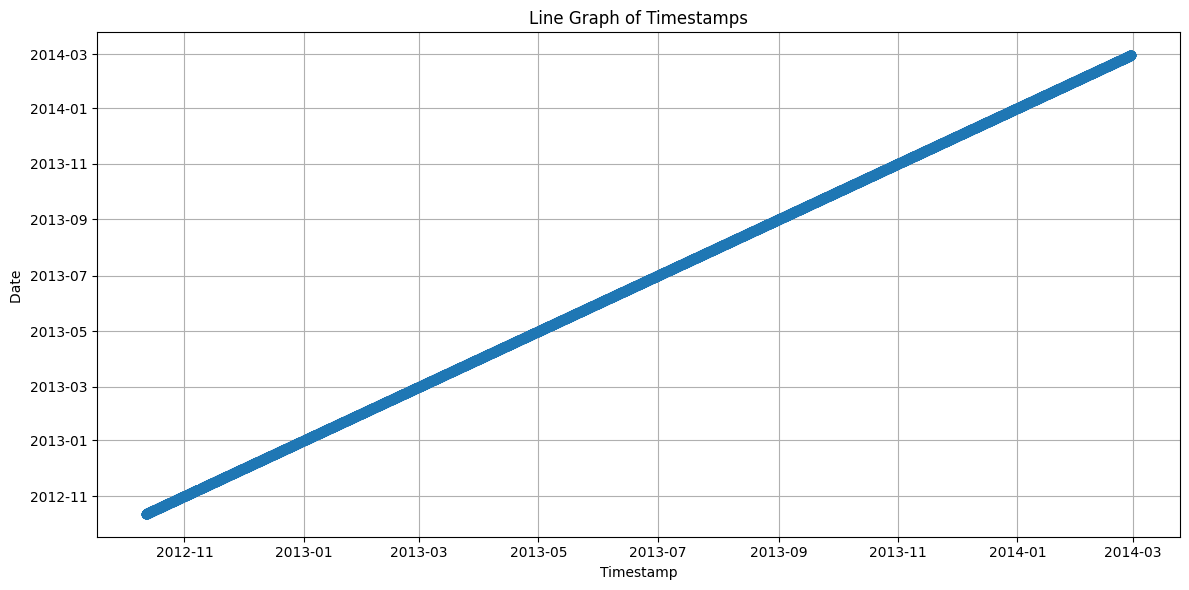

In [14]:

df['DateTime'] = pd.to_datetime(df['DateTime'])

# Create a new column with a constant value for plotting

# Plotting the timestamps as a line graph
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['DateTime'], marker='o', linestyle='-')
plt.title('Line Graph of Timestamps')
plt.xlabel('Timestamp')
plt.ylabel('Date ')
plt.grid(True)
plt.tight_layout()
plt.show()


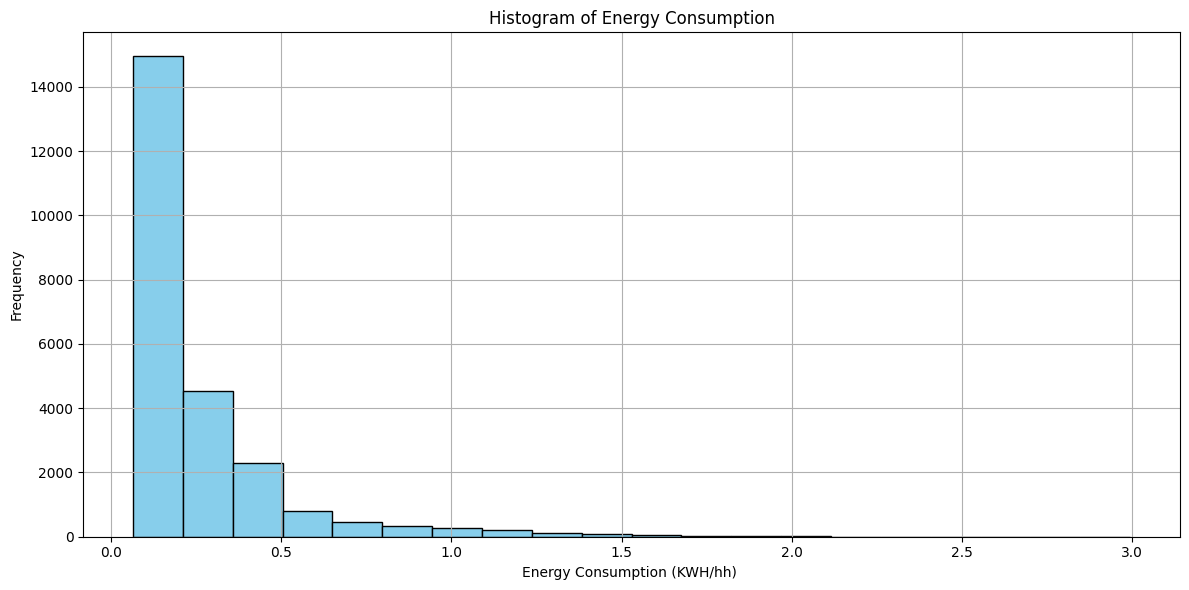

In [15]:
# Univariate example distribution of energy consumption values:
plt.figure(figsize=(12, 6))
plt.hist(df['KWH/hh (per half hour) '], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Energy Consumption')
plt.xlabel('Energy Consumption (KWH/hh) ')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
missing_values = df.isnull().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Identify and handle outliers (you can customize the threshold)
outlier_threshold = 3
df = df[(df['KWH/hh (per half hour) '] < outlier_threshold)]


# Check data range
start_date = '2012-10-12'
end_date = '2014-02-28'
df = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]

# Convert timestamp to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

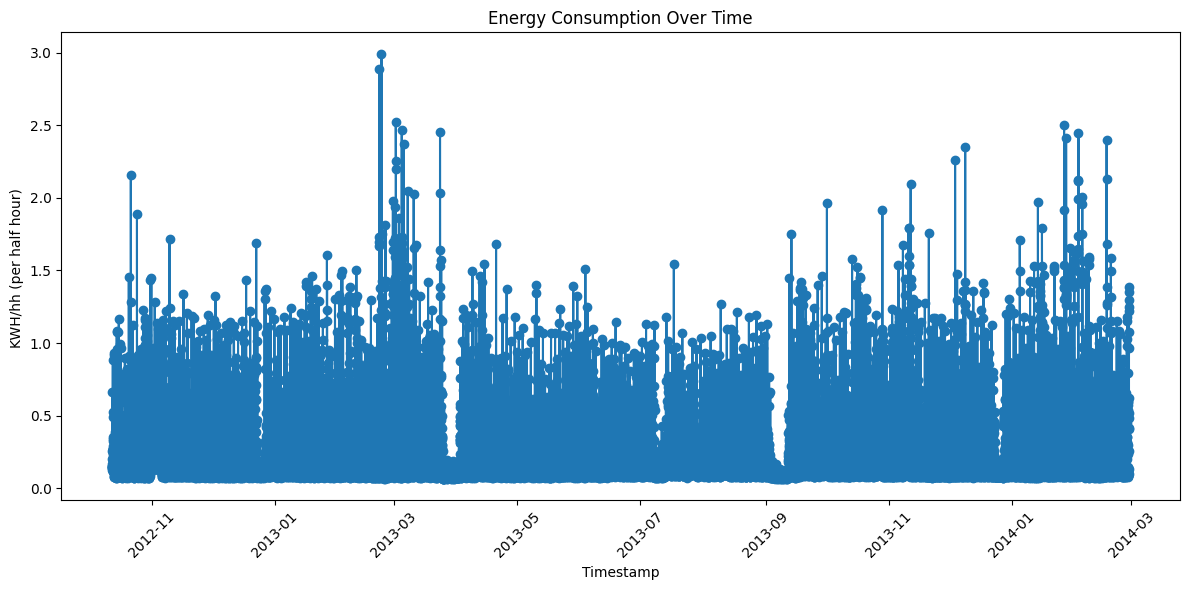

In [18]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Plot the timestamp against 'KWH/hh (per half hour)'
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['KWH/hh (per half hour) '], marker='o', linestyle='-')
plt.title('Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('KWH/hh (per half hour) ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()